## Observations and Insights 

Hello

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merge_inner = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
merge_inner.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice.
print(f"Before cleaning, there were {len(merge_inner['Mouse ID'].unique())} unique mice.")

Before cleaning, there were 249 unique mice.


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge_inner.duplicated(subset = ['Mouse ID', 'Timepoint'])
duplicates.value_counts()

# Create list to contain duplicate ids and loop through IDs to pull duplicates out
duplicate_ids = []
for i in range(len(duplicates)):
    if (duplicates[i]) and not (merge_inner['Mouse ID'][i] in duplicate_ids):
        duplicate_ids.append(merge_inner['Mouse ID'][i])
print(duplicate_ids)

['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merge_inner.loc[merge_inner['Mouse ID'] == 'g989', :]
duplicate_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_indices = merge_inner[merge_inner['Mouse ID'] == 'g989'].index
clean_mouse_df = merge_inner.drop(drop_indices, inplace = False)

In [11]:
# Checking the number of mice in the clean DataFrame.
print(f"After cleaning, there are now {len(clean_mouse_df['Mouse ID'].unique())} unique mice.")


After cleaning, there are now 248 unique mice.


## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Create groupby object
regimen_groupby = clean_mouse_df.groupby(by = "Drug Regimen")

# Calculate mean, median, variance, SD, and SEM
tumor_means = regimen_groupby['Tumor Volume (mm3)'].mean()
tumor_medians = regimen_groupby['Tumor Volume (mm3)'].median()
tumor_var = regimen_groupby['Tumor Volume (mm3)'].var()
tumor_sd = regimen_groupby['Tumor Volume (mm3)'].std()
tumor_sem = regimen_groupby['Tumor Volume (mm3)'].sem()

# Create summary table
summary_table1 = pd.DataFrame({'Tumor_Mean' : tumor_means,
                               'Tumor_Median' : tumor_medians,
                               'Tumor Variance' : tumor_var, 
                               'Tumor_Std' : tumor_sd, 
                               'Tumor_SEM' : tumor_sem})

summary_table1.head()


,Tumor_Mean,Tumor_Median,Tumor Variance,Tumor_Std,Tumor_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_table2 = clean_mouse_df.groupby(by = "Drug Regimen").agg({'Tumor Volume (mm3)' : ["mean", "median", "var", "std", "sem"]})
summary_table2.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

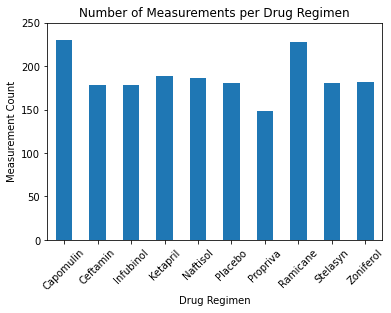

In [51]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_groupby.count().plot(kind = 'bar', 
                             y = 'Tumor Volume (mm3)', 
                             xlabel = 'Drug Regimen',
                             ylabel = 'Measurement Count',
                             title = 'Number of Measurements per Drug Regimen',
                             legend = False,
                             xlim = (-0.5, 9.5),
                             ylim = (0, 250),
                             rot = 45)


plt.show()



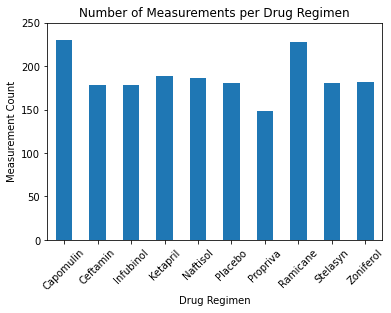

In [52]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Store the names of the drug regimens in a list
regimen_names = regimen_groupby['Tumor Volume (mm3)'].count().index

# Create bar plot with matplotlib
plt.bar(regimen_names , regimen_groupby['Tumor Volume (mm3)'].count(), width = 0.5)
plt.title('Number of Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Measurement Count')
plt.xticks(rotation = 45)
plt.xlim(-0.5, len(regimen_names) -0.5)
plt.ylim(0, 250)
plt.show()

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Get new data frame with unique mouse id and groupby sex
unique_ids_df = clean_mouse_df.drop_duplicates(subset = 'Mouse ID')
sex_groupby2 = clean_mouse_df.groupby('Sex')
sex_groupby = unique_ids_df.groupby('Sex')
sex_groupby.count()
# Create sex labels
#sex = unique_ids_df['Sex'].unique()
#print(sex)

# Create pie plot
sex_groupby2.count().plot.pie(y = sex_groupby2.count().index)





KeyError: "None of [Index(['Female', 'Male'], dtype='object', name='Sex')] are in the [columns]"

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
